# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df =  pd.read_csv(Path('./Resources/applicants_data.csv'))

# Review the DataFrame
print("applicants.csv data frame head:")
display(applicant_data_df.head())

applicants.csv data frame head:


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
display(applicant_data_df.dtypes)

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Degug checkpoint
display(applicant_data_df.shape)

(34299, 12)

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [5]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
print("applicants.csv data frame head:")
display(applicant_data_df.head())

applicants.csv data frame head:


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [6]:
# Degug checkpoint
display(applicant_data_df.shape)

(34299, 10)

In [7]:
# Create a list of categorical variables 
applicant_categorical_col_lst = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
print("applicant_categorical_col_lst:")
display(applicant_categorical_col_lst)

applicant_categorical_col_lst:


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [8]:
# Create a OneHotEncoder instance
one_hot_enc_inst = OneHotEncoder(sparse=False)

In [9]:
# Degug checkpoint
display(type(one_hot_enc_inst))

sklearn.preprocessing._encoders.OneHotEncoder

In [10]:
# Encode the categorcal variables using OneHotEncoder
applicant_data_categorical_onehotenc_npa = one_hot_enc_inst.fit_transform(applicant_data_df[applicant_categorical_col_lst])

In [11]:
# Degug checkpoint
display(type(applicant_data_categorical_onehotenc_npa))
display(len(applicant_data_categorical_onehotenc_npa))  # rows
display(len(applicant_data_categorical_onehotenc_npa[0]))  # columns
display(applicant_data_categorical_onehotenc_npa)

numpy.ndarray

34299

114

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
display(applicant_categorical_col_lst)

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
applicant_categorical_onehotenc_col_lst = one_hot_enc_inst.get_feature_names(applicant_categorical_col_lst)

In [14]:
# Degug checkpoint
display(applicant_categorical_onehotenc_col_lst.shape)
display(applicant_categorical_onehotenc_col_lst)

(114,)

array(['APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T12',
       'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T2',
       'APPLICATION_TYPE_T25', 'APPLICATION_TYPE_T29',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'APPLICATION_TYPE_T9', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C0',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1230', 'CLASSIFICATION_C1234',
       'CLASSIFICATION_C1235', 'CLASSIFICATION_C1236',
       'CLASSIFICATION_C1237', 'CLASSIFICATION_C1238',
       'CLASSIFICATION_C1240', 'CLASSIFICATION_C1245',
       'CLASSIFICATION_C1246', 'CLASSIFICATION_C1248',
       '

In [15]:
# Create a DataFrame with the encoded variables
applicant_data_categorical_onehotenc_df = pd.DataFrame(
    applicant_data_categorical_onehotenc_npa,
    columns = applicant_categorical_onehotenc_col_lst
)

# Review the DataFrame
print("applicant_data_categorical_onehotenc_df head:")
display(applicant_data_categorical_onehotenc_df.head())

applicant_data_categorical_onehotenc_df head:


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Degug checkpoint
display(applicant_data_categorical_onehotenc_df.shape)

(34299, 114)

In [17]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
applicant_data_numerical_df = applicant_data_df.drop(columns = applicant_categorical_col_lst)

In [18]:
# Degug checkpoint
print("applicant_data_numerical_df head:")
display(applicant_data_numerical_df.shape)
display(applicant_data_numerical_df.head())

applicant_data_numerical_df head:


(34299, 3)

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [19]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
applicant_data_numerical_onehotenc_df = pd.concat(
    [
        applicant_data_numerical_df,
        applicant_data_categorical_onehotenc_df
    ],
    axis=1
)

# Review the Dataframe
print("applicant_data_numerical_onehotenc_df:")
display(applicant_data_numerical_onehotenc_df.head())

applicant_data_numerical_onehotenc_df:


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Degug checkpoint
display(applicant_data_numerical_onehotenc_df.shape)

(34299, 117)

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [21]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X_df = applicant_data_numerical_onehotenc_df.drop(columns=['IS_SUCCESSFUL'])

# Review the features DataFrame
print("X_df:")
display(X_df.head())

X_df:


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Degug checkpoint
display(X_df.shape)

(34299, 116)

In [23]:
# Define the target set y using the IS_SUCCESSFUL column
y_srs = applicant_data_numerical_onehotenc_df["IS_SUCCESSFUL"]

# Display a sample of y
print("target set y:")
display(type(y_srs))
display(y_srs)

target set y:


pandas.core.series.Series

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [24]:
# Degug checkpoint
display(y_srs.shape)

(34299,)

### Step 6: Split the features and target sets into training and testing datasets.


In [25]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)

In [26]:
# Data checkpoint
display(type(X_train_df))
display(type(X_test_df))
display(type(y_train_srs))
display(type(y_test_srs))

display(X_train_df.shape)
display(X_test_df.shape)
display(y_train_srs.shape)
display(y_test_srs.shape)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.series.Series

(25724, 116)

(8575, 116)

(25724,)

(8575,)

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [27]:
# Create a StandardScaler instance
standard_scaler_inst = StandardScaler()

# Fit the scaler to the features training dataset
X_train_scaler = standard_scaler_inst.fit(X_train_df)

# Fit the scaler to the features training dataset
X_train_scaled_npa = X_train_scaler.transform(X_train_df)
X_test_scaled_npa = X_train_scaler.transform(X_test_df)

In [28]:
# Data checkpoint
display(X_train_scaled_npa.shape)
display(X_test_scaled_npa.shape)

(25724, 116)

(8575, 116)

In [29]:
# Convert back to dataframe (to make it easier to drop feature sets as part of evaluating different model permuations below)
X_train_scaled_df = pd.DataFrame(X_train_scaled_npa, columns = X_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled_npa, columns = X_df.columns)

In [30]:
# Data checkpoint
display(X_train_scaled_df.shape)
display(X_test_scaled_df.shape)

(25724, 116)

(8575, 116)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [31]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_df.shape[1]

# Review the number of features
print("Number of input features = ", number_input_features)

Number of input features =  116


In [32]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [33]:
# Define the number of hidden nodes for the first hidden layer
num_hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
print("Number of hidden nodes in layer 1 = ", num_hidden_nodes_layer1)

Number of hidden nodes in layer 1 =  58


In [34]:
# Define the number of hidden nodes for the second hidden layer
num_hidden_nodes_layer2 =  (num_hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
print("Number of hidden nodes in layer 2 = ", num_hidden_nodes_layer2)

Number of hidden nodes in layer 2 =  29


In [35]:
# Create the Sequential model instance
nn_sequential_original_model = Sequential()

In [36]:
# Add the first hidden layer
nn_sequential_original_model.add(Dense(units=num_hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

In [37]:
# Add the second hidden layer
nn_sequential_original_model.add(Dense(units=num_hidden_nodes_layer2, activation="relu"))

In [38]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn_sequential_original_model.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [39]:
# Display the Sequential model summary
nn_sequential_original_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [40]:
# Compile the Sequential model
nn_sequential_original_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Fit the model using 50 epochs and the training data
nn_sequential_original_model_fit = nn_sequential_original_model.fit(X_train_scaled_df, y_train_srs, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 699us/step - loss: 0.5787 - accuracy: 0.7215
Epoch 2/50
804/804 [==============================] - 1s 692us/step - loss: 0.5546 - accuracy: 0.7293
Epoch 3/50
804/804 [==============================] - 1s 694us/step - loss: 0.5489 - accuracy: 0.7304
Epoch 4/50
804/804 [==============================] - 1s 692us/step - loss: 0.5474 - accuracy: 0.7330
Epoch 5/50
804/804 [==============================] - 1s 694us/step - loss: 0.5453 - accuracy: 0.7331
Epoch 6/50
804/804 [==============================] - 1s 693us/step - loss: 0.5447 - accuracy: 0.7336
Epoch 7/50
804/804 [==============================] - 1s 687us/step - loss: 0.5433 - accuracy: 0.7338
Epoch 8/50
804/804 [==============================] - 1s 694us/step - loss: 0.5428 - accuracy: 0.7357
Epoch 9/50
804/804 [==============================] - 1s 696us/step - loss: 0.5416 - accuracy: 0.7348
Epoch 10/50
804/804 [==============================] - 1s 715us/step - loss: 0.541

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [42]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
nn_sequential_permutation_model_loss, nn_sequential_permutation_model_accuracy =  nn_sequential_original_model.evaluate(X_test_scaled_df,y_test_srs,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy}")

268/268 - 0s - loss: 0.5536 - accuracy: 0.7315 - 227ms/epoch - 847us/step
Loss: 0.5536145567893982, Accuracy: 0.7315452098846436


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [43]:
# Set the model's file path
file_path = Path("./Resources/AlphabetSoup.h5")

# Export your model to a HDF5 file
nn_sequential_original_model.save_weights(file_path)    

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternate Models

In [44]:
# Create a list of activation functions that will permutate over
#activation_function_lst = ["relu", "sigmoid", "exponential", "swish"]
activation_function_lst = ["relu", "sigmoid"]  # Condensed list, takes too long to run
num_activation_functions = len(activation_function_lst)

In [45]:
# Debug checkpoint
display(num_activation_functions)
display(activation_function_lst)

2

['relu', 'sigmoid']

In [46]:
# Create a copy of the categorical feature list  (will iterate through and drop one column at a time to determine if removing the feature set impacts the model result)
model_feature_perm_lst = applicant_categorical_col_lst.copy()
model_feature_perm_lst.insert(0,'NO_FEATURE_DROPS')  # Add a dummy "No Filter" to not match any column names - and thus preserving the full original list (i.e. no columns drops)
num_model_feature_perm_lst = len(model_feature_perm_lst)

In [47]:
# Debug checkpoint
display(num_model_feature_perm_lst)
display(model_feature_perm_lst)

8

['NO_FEATURE_DROPS',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [48]:
# Setup neural network model permutation parameters

# Permuatate through the feature set (drop one feature column per permuation)
strt_num_model_feature_perm_lst_idx = 0
end_num_model_feature_perm_lst_idx = num_model_feature_perm_lst-1
inc_num_model_feature_perm_lst_idx = 1

# Permuatate over different activation lists
strt_num_activation_functions_idx = 0
end_num_activation_functions_idx = num_activation_functions-1
inc_num_activation_functions_idx = 1

# Permuatate the # of hidden layers
strt_num_hidden_layers = 1
end_hidden_layers = 2   # (this application supports up to 3 hidden layers, takes to long to run, so condensed it to 2 - no significant improvement seen with 3 anyways)
inc_hidden_layers = 1

# Permuatate the # of nodes in hidden layer 1
strt_num_hidden_nodes_layer1 = 8
end_num_hidden_nodes_layer1 = 16
inc_num_hidden_nodes_layer1 = 8

# Permuatate the # of nodes in hidden layer 2
strt_num_hidden_nodes_layer2 = 4
end_num_hidden_nodes_layer2 = 4
inc_num_hidden_nodes_layer2 = 4

# Permuatate the # of nodes in hidden layer 3
strt_num_hidden_nodes_layer3 = 2
end_num_hidden_nodes_layer3 = 2
inc_num_hidden_nodes_layer3 = 2

# Permuatate the # of epochs
strt_num_epochs = 25
end_num_epochs = 100
inc_num_epochs = 25

In [49]:
# Initialize the starting model permutation values
num_model_feature_perm_lst_idx = strt_num_model_feature_perm_lst_idx

num_hidden_layers = strt_num_hidden_layers
num_activation_functions_idx = strt_num_activation_functions_idx
num_hidden_nodes_layer1 = strt_num_hidden_nodes_layer1
num_hidden_nodes_layer2 = strt_num_hidden_nodes_layer2
num_hidden_nodes_layer3 = strt_num_hidden_nodes_layer3
num_epochs = strt_num_epochs

# Create empty lists which will store the model parameters for each permutation run
num_model_feature_perm_lst_idx_lst = []
num_activation_functions_idx_lst = []
num_hidden_layers_lst = []
num_hidden_nodes_layer1_lst = []
num_hidden_nodes_layer2_lst = []
num_hidden_nodes_layer3_lst = []
num_epochs_lst        = []

total_num_model_permutations = 0;
is_done_setting_up_model_permutations = False

print_debug = True

# Loop through each of the permutations
while (not is_done_setting_up_model_permutations):

    # Make sure the # of nodes in subsequent hidden layers is always smaller than the current hidden layer
    if ((num_hidden_nodes_layer2 < num_hidden_nodes_layer1) and (num_hidden_nodes_layer3 < num_hidden_nodes_layer2)):
        
        # Add to the list the current permuation model parameters
        num_model_feature_perm_lst_idx_lst.append(num_model_feature_perm_lst_idx)
        num_activation_functions_idx_lst.append(num_activation_functions_idx)
        num_hidden_layers_lst.append(num_hidden_layers)
        num_hidden_nodes_layer1_lst.append(num_hidden_nodes_layer1)
        num_hidden_nodes_layer2_lst.append(num_hidden_nodes_layer2)
        num_hidden_nodes_layer3_lst.append(num_hidden_nodes_layer3)
        num_epochs_lst.append(num_epochs)

        # Optional debug printing of values
        if (print_debug):
            print(f"Setting Up Model Permuation #{total_num_model_permutations+1}")
            if (num_model_feature_perm_lst_idx > 0):
                print(f"\tFeature Drop = {model_feature_perm_lst[num_model_feature_perm_lst_idx]}")
            print(f"\t Use Model Activation Function = {activation_function_lst[num_activation_functions_idx]}")                
            print(f"\t# Hidden Layers = {num_hidden_layers}")
            print(f"\t\t# Hidden Layer 1 Nodes = {num_hidden_nodes_layer1}")
            if (num_hidden_layers > 1):
                print(f"\t\t# Hidden Layer 2 Nodes = {num_hidden_nodes_layer2}")
            if (num_hidden_layers > 2):
                print(f"\t\t# Hidden Layer 3 Nodes = {num_hidden_nodes_layer3}")
            print(f"\t# Epochs = {num_epochs}")

        # Increment the total number of runs/permuataions variable
        total_num_model_permutations = total_num_model_permutations + 1  
    
    # Scan through the different permuations values,
    #    if did not reach its end/final value, increment by the defined "increment" value
    #    else reset the value to its starting value, and move on to the next permuation parameter
    # Permutation order:
    #    # of epochs
    #    # of nodes in hidden layer 3 (if # of hidden layers has 3 layers)
    #    # of nodes in hidden layer 2 (if # of hidden layers has 2 layers)
    #    # of nodes in hidden layer 1 (there will always be a hidden layer 1))
    #    # of hidden layers
    
    if (num_epochs < end_num_epochs): 
        num_epochs = num_epochs + inc_num_epochs 
    else:
        num_epochs = strt_num_epochs
        
        if ((num_hidden_layers > 2) and (num_hidden_nodes_layer3 < end_num_hidden_nodes_layer3)): 
            num_hidden_nodes_layer3 = num_hidden_nodes_layer3 + inc_num_hidden_nodes_layer3
        else:
            num_hidden_nodes_layer3 = strt_num_hidden_nodes_layer3

            if ((num_hidden_layers > 1) and (num_hidden_nodes_layer2 < end_num_hidden_nodes_layer2)): 
                num_hidden_nodes_layer2 = num_hidden_nodes_layer2 + inc_num_hidden_nodes_layer2
            else:
                num_hidden_nodes_layer2 = strt_num_hidden_nodes_layer2

                if (num_hidden_nodes_layer1 < end_num_hidden_nodes_layer1): 
                    num_hidden_nodes_layer1 = num_hidden_nodes_layer1 + inc_num_hidden_nodes_layer1
                else:
                    num_hidden_nodes_layer1 = strt_num_hidden_nodes_layer1

                    if (num_hidden_layers < end_hidden_layers): 
                        num_hidden_layers = num_hidden_layers + inc_hidden_layers
                    else:
                        num_hidden_layers = strt_num_hidden_layers

                        if (num_activation_functions_idx < end_num_activation_functions_idx): 
                            num_activation_functions_idx = num_activation_functions_idx + inc_num_activation_functions_idx
                        else:
                            num_activation_functions_idx = strt_num_activation_functions_idx
                        
                            if (num_model_feature_perm_lst_idx < end_num_model_feature_perm_lst_idx):
                                num_model_feature_perm_lst_idx = num_model_feature_perm_lst_idx + inc_num_model_feature_perm_lst_idx
                            else:                            
                                is_done_setting_up_model_permutations = True 

Setting Up Model Permuation #1
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 8
	# Epochs = 25
Setting Up Model Permuation #2
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 8
	# Epochs = 50
Setting Up Model Permuation #3
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 8
	# Epochs = 75
Setting Up Model Permuation #4
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 8
	# Epochs = 100
Setting Up Model Permuation #5
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 16
	# Epochs = 25
Setting Up Model Permuation #6
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 16
	# Epochs = 50
Setting Up Model Permuation #7
	 Use Model Activation Function = relu
	# Hidden Layers = 1
		# Hidden Layer 1 Nodes = 16
	# Epochs = 75
Setting Up Model Permuation #8
	 Use Model Activati

In [50]:
# Run the neural network through all the permutations

print_debug = True
model_verbose = False

# create an empty array that will hold the neural network model for each permuation
nn_sequential_permutation_model_npa = np.empty(total_num_model_permutations,  dtype=np.object)

# Keep track of model permutation with best results
best_permutation_num = 0
best_loss_value = 0
best_accuracy_value = 0

# Create an initial empty list containter to hold the fit model history and permuation/losses
nn_sequential_permutation_model_fit_lst = []
nn_sequential_permutation_model_loss_lst = []
nn_sequential_permutation_model_accuracy_lst = []

for x in range(total_num_model_permutations):

    # Check to see if should drop a feature in this model permutation, if yes, drop it
    if (num_model_feature_perm_lst_idx_lst[x] > 0):
        feature_to_drop = model_feature_perm_lst[num_model_feature_perm_lst_idx_lst[x]]
        display(feature_to_drop)
        feature_to_drop_idx = X_train_scaled_df.loc[:,X_train_scaled_df.columns.str.startswith(feature_to_drop)].columns        
        feature_to_drop_npa = np.array(feature_to_drop_idx)
        
        X_train_scaled_feature_drop_df = X_train_scaled_df.drop(columns=feature_to_drop_npa)
        X_test_scaled_feature_drop_df = X_test_scaled_df.drop(columns=feature_to_drop_npa)
    else:
        X_train_scaled_feature_drop_df = X_train_scaled_df
        X_test_scaled_feature_drop_df = X_test_scaled_df

    # Define the the number of inputs (features) to the model
    number_input_features = X_train_scaled_feature_drop_df.shape[1]
    number_output_neurons = 1

    if (print_debug):
        print(f"Running Permuation #{x+1}") 
        if (num_model_feature_perm_lst_idx_lst[x] > 0):
            print(f"\tFeature Drop = {model_feature_perm_lst[num_model_feature_perm_lst_idx_lst[x]]}")
        print(f"\t# Input Features = {number_input_features}")
        print(f"\t Use Model Activation Function = {activation_function_lst[num_activation_functions_idx_lst[x]]}")                
        print(f"\t# Hidden Layers = {num_hidden_layers_lst[x]}")
        print(f"\t# Layer 1 Nodes = {num_hidden_nodes_layer1_lst[x]}")
        if (num_hidden_layers_lst[x] > 1):
            print(f"\t# Layer 2 Nodes = {num_hidden_nodes_layer2_lst[x]}")
        if (num_hidden_layers_lst[x] > 2):
            print(f"\t# Layer 3 Nodes = {num_hidden_nodes_layer3_lst[x]}")
        print(f"\t# of Output Nuerons = {number_output_neurons}")
        print(f"\t# Epochs = {num_epochs_lst[x]}")
    
    # Create the Sequential model instance
    nn_sequential_permutation_model_npa[x] = Sequential()

    # Add the first hidden layer
    nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer1_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]], input_dim=number_input_features))

    # If exist in this model permutation, add the second hidden layer
    if (num_hidden_layers_lst[x] > 1):
        nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer2_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]]))

    # If exist in this model permutation, add the third hidden layer
    if (num_hidden_layers_lst[x] > 2):
        nn_sequential_permutation_model_npa[x].add(Dense(units=num_hidden_nodes_layer3_lst[x], activation=activation_function_lst[num_activation_functions_idx_lst[x]]))         

    # Add the output layer to the model specifying the number of output neurons and activation function
    nn_sequential_permutation_model_npa[x].add(Dense(units=number_output_neurons, activation=activation_function_lst[num_activation_functions_idx_lst[x]]))

    # Display the Sequential model summary
    #nn_sequential_permutation_model_npa[x].summary()

    # Compile the Sequential model
    nn_sequential_permutation_model_npa[x].compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    # Fit the model and the training data
    nn_sequential_original_model_fit = nn_sequential_permutation_model_npa[x].fit(X_train_scaled_feature_drop_df, y_train_srs, epochs=num_epochs_lst[x], verbose=model_verbose) 

    # Evaluate the model loss and accuracy metrics using the evaluate method and the test data
    nn_sequential_permutation_model_loss, nn_sequential_permutation_model_accuracy =  nn_sequential_permutation_model_npa[x].evaluate(X_test_scaled_feature_drop_df,y_test_srs,verbose=0)

    # If this model permutation provided the best results, update "best" value set
    # (Finding best accuracy)
    if (nn_sequential_permutation_model_accuracy > best_accuracy_value):
        best_permutation_num = x
        best_loss_value = nn_sequential_permutation_model_loss
        best_accuracy_value = nn_sequential_permutation_model_accuracy
    
    # Display the model loss and accuracy results
    if (print_debug):
        print(f"\t\t\t***                       Permutation:{x+1} ==> Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy} ***") 
        print(f"\t\t\t*** Best Running Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")                 

    nn_sequential_permutation_model_fit_lst.append(nn_sequential_original_model_fit)
    nn_sequential_permutation_model_loss_lst.append(nn_sequential_permutation_model_loss)
    nn_sequential_permutation_model_accuracy_lst.append(nn_sequential_permutation_model_accuracy)
        
print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")      

Running Permuation #1
	# Input Features = 116
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:1 ==> Loss: 0.6494644284248352, Accuracy: 0.7259474992752075 ***
			*** Best Running Results: Permutation:1 ==> Loss: 0.6494644284248352, Accuracy: 0.7259474992752075 ***
Running Permuation #2
	# Input Features = 116
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:2 ==> Loss: 0.6494274735450745, Accuracy: 0.7304956316947937 ***
			*** Best Running Results: Permutation:2 ==> Loss: 0.6494274735450745, Accuracy: 0.7304956316947937 ***
Running Permuation #3
	# Input Features = 116
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:3 ==> Loss: 0.841793954372406, Acc

'APPLICATION_TYPE'

Running Permuation #33
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:33 ==> Loss: 0.7966938614845276, Accuracy: 0.6995918154716492 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #34
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:34 ==> Loss: 1.1216055154800415, Accuracy: 0.686530590057373 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #35
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:35 ==> Loss: 0.788077712059021, Accuracy: 0.6994752287864685 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #36
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:36 ==> Loss: 1.1924349069595337, Accuracy: 0.6806997060775757 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #37
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:37 ==> Loss: 0.8330726623535156, Accuracy: 0.701924204826355 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #38
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:38 ==> Loss: 0.9418739080429077, Accuracy: 0.6935276985168457 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #39
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:39 ==> Loss: 0.9352357387542725, Accuracy: 0.6958600878715515 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #40
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:40 ==> Loss: 0.7160436511039734, Accuracy: 0.6985422968864441 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #41
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:41 ==> Loss: 0.7559831738471985, Accuracy: 0.7103207111358643 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #42
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:42 ==> Loss: 0.8250499367713928, Accuracy: 0.7020407915115356 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #43
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:43 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #44
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:44 ==> Loss: 0.6437753438949585, Accuracy: 0.7079883217811584 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #45
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:45 ==> Loss: 0.6662123203277588, Accuracy: 0.7069388031959534 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #46
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:46 ==> Loss: 0.69864821434021, Accuracy: 0.7079883217811584 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #47
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:47 ==> Loss: 0.6390056014060974, Accuracy: 0.7100874781608582 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #48
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:48 ==> Loss: 0.5967820882797241, Accuracy: 0.7064722776412964 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #49
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:49 ==> Loss: 0.5725098252296448, Accuracy: 0.7105539441108704 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #50
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:50 ==> Loss: 0.5731229186058044, Accuracy: 0.7093877792358398 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #51
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:51 ==> Loss: 0.5737773180007935, Accuracy: 0.707055389881134 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #52
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:52 ==> Loss: 0.5728061199188232, Accuracy: 0.7121865749359131 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #53
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:53 ==> Loss: 0.5720615983009338, Accuracy: 0.7117201089859009 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #54
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:54 ==> Loss: 0.5725589990615845, Accuracy: 0.7140524983406067 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #55
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:55 ==> Loss: 0.5721367001533508, Accuracy: 0.7110204100608826 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #56
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:56 ==> Loss: 0.5723154544830322, Accuracy: 0.7125364542007446 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #57
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:57 ==> Loss: 0.5731891989707947, Accuracy: 0.7100874781608582 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #58
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:58 ==> Loss: 0.5728083848953247, Accuracy: 0.7078717350959778 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #59
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:59 ==> Loss: 0.5727565884590149, Accuracy: 0.709621012210846 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #60
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:60 ==> Loss: 0.5715728402137756, Accuracy: 0.7116035223007202 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #61
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:61 ==> Loss: 0.5725249648094177, Accuracy: 0.711953341960907 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #62
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:62 ==> Loss: 0.5713620185852051, Accuracy: 0.7128862738609314 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #63
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:63 ==> Loss: 0.5744417309761047, Accuracy: 0.7118367552757263 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'APPLICATION_TYPE'

Running Permuation #64
	Feature Drop = APPLICATION_TYPE
	# Input Features = 99
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:64 ==> Loss: 0.5720341801643372, Accuracy: 0.7123032212257385 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #65
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:65 ==> Loss: 1.5611684322357178, Accuracy: 0.6240233182907104 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #66
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:66 ==> Loss: 0.7921445369720459, Accuracy: 0.6467638611793518 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #67
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:67 ==> Loss: 0.8802786469459534, Accuracy: 0.6531778573989868 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #68
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:68 ==> Loss: 0.8446721434593201, Accuracy: 0.6490961909294128 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #69
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:69 ==> Loss: 0.833892285823822, Accuracy: 0.6488629579544067 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #70
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:70 ==> Loss: 1.0772440433502197, Accuracy: 0.6262390613555908 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #71
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:71 ==> Loss: 0.7452751398086548, Accuracy: 0.6560932993888855 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #72
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:72 ==> Loss: 0.6658421158790588, Accuracy: 0.649329423904419 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #73
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:73 ==> Loss: 0.65486741065979, Accuracy: 0.6584256291389465 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #74
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:74 ==> Loss: 0.7299047708511353, Accuracy: 0.6391837000846863 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #75
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:75 ==> Loss: 0.6753798127174377, Accuracy: 0.6586589217185974 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #76
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:76 ==> Loss: 0.632962703704834, Accuracy: 0.6518950462341309 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #77
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:77 ==> Loss: 0.6385387778282166, Accuracy: 0.6510787010192871 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #78
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:78 ==> Loss: 0.7001690864562988, Accuracy: 0.6330029368400574 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #79
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:79 ==> Loss: 0.6684340834617615, Accuracy: 0.6511953473091125 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #80
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:80 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #81
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:81 ==> Loss: 0.6089575886726379, Accuracy: 0.6605247855186462 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #82
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:82 ==> Loss: 0.6070150136947632, Accuracy: 0.6608746647834778 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #83
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:83 ==> Loss: 0.607219934463501, Accuracy: 0.6609912514686584 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #84
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:84 ==> Loss: 0.6062195897102356, Accuracy: 0.6612244844436646 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #85
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:85 ==> Loss: 0.6085914373397827, Accuracy: 0.6594752073287964 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #86
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:86 ==> Loss: 0.6076614856719971, Accuracy: 0.6619241833686829 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #87
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:87 ==> Loss: 0.6065190434455872, Accuracy: 0.6629737615585327 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #88
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:88 ==> Loss: 0.6071668267250061, Accuracy: 0.6599416732788086 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #89
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:89 ==> Loss: 0.607107937335968, Accuracy: 0.6544606685638428 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #90
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:90 ==> Loss: 0.6057905554771423, Accuracy: 0.6607580184936523 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #91
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:91 ==> Loss: 0.6067527532577515, Accuracy: 0.6550437211990356 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #92
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:92 ==> Loss: 0.6072521209716797, Accuracy: 0.6595918536186218 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #93
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:93 ==> Loss: 0.6066856980323792, Accuracy: 0.6619241833686829 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #94
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:94 ==> Loss: 0.6060351133346558, Accuracy: 0.6598250865936279 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #95
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:95 ==> Loss: 0.6058655977249146, Accuracy: 0.6608746647834778 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'AFFILIATION'

Running Permuation #96
	Feature Drop = AFFILIATION
	# Input Features = 110
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:96 ==> Loss: 0.6070902347564697, Accuracy: 0.658542275428772 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #97
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:97 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #98
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:98 ==> Loss: 0.6785881519317627, Accuracy: 0.7227988243103027 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #99
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:99 ==> Loss: 0.8346143960952759, Accuracy: 0.7191836833953857 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #100
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:100 ==> Loss: 0.8078091740608215, Accuracy: 0.7208163142204285 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #101
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:101 ==> Loss: 0.79537433385849, Accuracy: 0.7238484025001526 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #102
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:102 ==> Loss: 0.7817521095275879, Accuracy: 0.7175509929656982 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #103
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:103 ==> Loss: 0.8417925238609314, Accuracy: 0.716035008430481 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #104
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:104 ==> Loss: 0.5919231176376343, Accuracy: 0.7230320572853088 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #105
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:105 ==> Loss: 0.6590256094932556, Accuracy: 0.7210495471954346 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #106
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:106 ==> Loss: 0.6256121397018433, Accuracy: 0.7231487035751343 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #107
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:107 ==> Loss: 0.6207056641578674, Accuracy: 0.7246647477149963 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #108
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:108 ==> Loss: 0.6957518458366394, Accuracy: 0.7215160131454468 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #109
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:109 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #110
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:110 ==> Loss: 0.606520414352417, Accuracy: 0.7257142663002014 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #111
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:111 ==> Loss: 0.5986526012420654, Accuracy: 0.7241982221603394 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #112
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:112 ==> Loss: 0.5760693550109863, Accuracy: 0.7245481014251709 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #113
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:113 ==> Loss: 0.5708755850791931, Accuracy: 0.7258309125900269 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #114
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:114 ==> Loss: 0.5705581307411194, Accuracy: 0.7241982221603394 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #115
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:115 ==> Loss: 0.5710684657096863, Accuracy: 0.7241982221603394 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #116
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:116 ==> Loss: 0.5698025822639465, Accuracy: 0.7240816354751587 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #117
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:117 ==> Loss: 0.5706160068511963, Accuracy: 0.7264139652252197 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #118
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:118 ==> Loss: 0.569774329662323, Accuracy: 0.7237317562103271 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #119
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:119 ==> Loss: 0.5703127980232239, Accuracy: 0.7236151695251465 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #120
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:120 ==> Loss: 0.5702718496322632, Accuracy: 0.7237317562103271 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #121
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:121 ==> Loss: 0.5722176432609558, Accuracy: 0.7245481014251709 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #122
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:122 ==> Loss: 0.5706460475921631, Accuracy: 0.7248979806900024 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #123
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:123 ==> Loss: 0.5711658596992493, Accuracy: 0.7239649891853333 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #124
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:124 ==> Loss: 0.5702541470527649, Accuracy: 0.7241982221603394 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #125
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:125 ==> Loss: 0.57125324010849, Accuracy: 0.7252478003501892 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #126
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:126 ==> Loss: 0.5715111494064331, Accuracy: 0.7244315147399902 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #127
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:127 ==> Loss: 0.5701048374176025, Accuracy: 0.7232652902603149 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'CLASSIFICATION'

Running Permuation #128
	Feature Drop = CLASSIFICATION
	# Input Features = 45
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:128 ==> Loss: 0.5699213743209839, Accuracy: 0.7245481014251709 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #129
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:129 ==> Loss: 0.8325850367546082, Accuracy: 0.7243148684501648 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #130
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:130 ==> Loss: 0.9851092100143433, Accuracy: 0.709854245185852 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #131
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:131 ==> Loss: 0.5963842272758484, Accuracy: 0.7286297082901001 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #132
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:132 ==> Loss: 0.7489320635795593, Accuracy: 0.7176676392555237 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #133
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:133 ==> Loss: 0.9348236918449402, Accuracy: 0.7112536430358887 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #134
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:134 ==> Loss: 0.6697842478752136, Accuracy: 0.7281632423400879 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #135
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:135 ==> Loss: 0.7926196455955505, Accuracy: 0.7208163142204285 ***
			*** Best Running Results: Permutation:22 ==> Loss: 0.5499290227890015, Accuracy: 0.7330612540245056 ***


'USE_CASE'

Running Permuation #136
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #137
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:137 ==> Loss: 0.6010857820510864, Accuracy: 0.7321282625198364 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #138
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:138 ==> Loss: 0.5914398431777954, Accuracy: 0.7253644466400146 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #139
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:139 ==> Loss: 0.5697686076164246, Accuracy: 0.7297959327697754 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #140
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:140 ==> Loss: 0.5946468710899353, Accuracy: 0.7300291657447815 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #141
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:141 ==> Loss: 0.5835129022598267, Accuracy: 0.7268804907798767 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #142
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:142 ==> Loss: 0.5971288084983826, Accuracy: 0.7302623987197876 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #143
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:143 ==> Loss: 0.6307361721992493, Accuracy: 0.7293294668197632 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #144
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:144 ==> Loss: 0.5937245488166809, Accuracy: 0.7295626997947693 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #145
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:145 ==> Loss: 0.5540232062339783, Accuracy: 0.731195330619812 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #146
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:146 ==> Loss: 0.5544481873512268, Accuracy: 0.7308454513549805 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #147
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:147 ==> Loss: 0.5524041056632996, Accuracy: 0.7318950295448303 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #148
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:148 ==> Loss: 0.5525705218315125, Accuracy: 0.7325947284698486 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #149
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:149 ==> Loss: 0.5532943606376648, Accuracy: 0.7300291657447815 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #150
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:150 ==> Loss: 0.552855372428894, Accuracy: 0.7310787439346313 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #151
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:151 ==> Loss: 0.5526150465011597, Accuracy: 0.7330612540245056 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #152
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:152 ==> Loss: 0.5536307096481323, Accuracy: 0.729912519454956 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #153
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:153 ==> Loss: 0.560897707939148, Accuracy: 0.7317784428596497 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #154
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:154 ==> Loss: 0.5546942353248596, Accuracy: 0.7310787439346313 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #155
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:155 ==> Loss: 0.5515382289886475, Accuracy: 0.7331778407096863 ***
			*** Best Running Results: Permutation:136 ==> Loss: 0.600703239440918, Accuracy: 0.7337609529495239 ***


'USE_CASE'

Running Permuation #156
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'USE_CASE'

Running Permuation #157
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:157 ==> Loss: 0.5551220774650574, Accuracy: 0.7290962338447571 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'USE_CASE'

Running Permuation #158
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:158 ==> Loss: 0.5516747236251831, Accuracy: 0.7332944869995117 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'USE_CASE'

Running Permuation #159
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:159 ==> Loss: 0.5523794889450073, Accuracy: 0.7301457524299622 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'USE_CASE'

Running Permuation #160
	Feature Drop = USE_CASE
	# Input Features = 111
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:160 ==> Loss: 0.551356852054596, Accuracy: 0.7328279614448547 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #161
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:161 ==> Loss: 1.3032538890838623, Accuracy: 0.6973760724067688 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #162
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:162 ==> Loss: 0.743197500705719, Accuracy: 0.7167347073554993 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #163
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:163 ==> Loss: 0.8807559609413147, Accuracy: 0.7149854302406311 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #164
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:164 ==> Loss: 2.386218786239624, Accuracy: 0.6541107892990112 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #165
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:165 ==> Loss: 1.0210204124450684, Accuracy: 0.704723060131073 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #166
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:166 ==> Loss: 0.7045465111732483, Accuracy: 0.717084527015686 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #167
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:167 ==> Loss: 0.7091327905654907, Accuracy: 0.718367338180542 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #168
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:168 ==> Loss: 0.6838757991790771, Accuracy: 0.7208163142204285 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #169
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:169 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #170
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:170 ==> Loss: 0.5848617553710938, Accuracy: 0.7287463545799255 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #171
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:171 ==> Loss: 0.6143212914466858, Accuracy: 0.7248979806900024 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #172
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:172 ==> Loss: 0.5748000144958496, Accuracy: 0.7266472578048706 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #173
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:173 ==> Loss: 0.6463087201118469, Accuracy: 0.7176676392555237 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #174
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:174 ==> Loss: 0.6092329025268555, Accuracy: 0.7268804907798767 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #175
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:175 ==> Loss: 0.5852887630462646, Accuracy: 0.7252478003501892 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #176
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:176 ==> Loss: 8.163082122802734, Accuracy: 0.4707871675491333 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #177
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:177 ==> Loss: 0.5590322613716125, Accuracy: 0.7258309125900269 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #178
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:178 ==> Loss: 0.5593734383583069, Accuracy: 0.7281632423400879 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #179
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:179 ==> Loss: 0.5589329600334167, Accuracy: 0.7261807322502136 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #180
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:180 ==> Loss: 0.5589382648468018, Accuracy: 0.728863000869751 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #181
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:181 ==> Loss: 0.559040904045105, Accuracy: 0.727580189704895 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #182
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:182 ==> Loss: 0.5577096343040466, Accuracy: 0.7276967763900757 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #183
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:183 ==> Loss: 0.5592955946922302, Accuracy: 0.7244315147399902 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #184
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:184 ==> Loss: 0.5596866011619568, Accuracy: 0.7266472578048706 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #185
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:185 ==> Loss: 0.5591186285018921, Accuracy: 0.7276967763900757 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #186
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:186 ==> Loss: 0.5579110980033875, Accuracy: 0.7287463545799255 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #187
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:187 ==> Loss: 0.5569661855697632, Accuracy: 0.7292128205299377 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #188
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:188 ==> Loss: 0.5583174228668213, Accuracy: 0.7269970774650574 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #189
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:189 ==> Loss: 0.5584132075309753, Accuracy: 0.7281632423400879 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #190
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:190 ==> Loss: 0.5565891265869141, Accuracy: 0.7274635434150696 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #191
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:191 ==> Loss: 0.557003915309906, Accuracy: 0.728396475315094 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'ORGANIZATION'

Running Permuation #192
	Feature Drop = ORGANIZATION
	# Input Features = 112
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:192 ==> Loss: 0.5581945180892944, Accuracy: 0.727580189704895 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #193
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:193 ==> Loss: 0.7789437770843506, Accuracy: 0.7202332615852356 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #194
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:194 ==> Loss: 1.0915488004684448, Accuracy: 0.7093877792358398 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #195
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:195 ==> Loss: 2.409632921218872, Accuracy: 0.6553936004638672 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #196
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:196 ==> Loss: 0.6589170694351196, Accuracy: 0.7250145673751831 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #197
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:197 ==> Loss: 1.1853593587875366, Accuracy: 0.6751020550727844 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #198
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:198 ==> Loss: 1.568680763244629, Accuracy: 0.6958600878715515 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #199
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:199 ==> Loss: 0.6570287346839905, Accuracy: 0.726064145565033 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #200
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:200 ==> Loss: 0.6393526792526245, Accuracy: 0.7276967763900757 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #201
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:201 ==> Loss: 0.6999658346176147, Accuracy: 0.7266472578048706 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #202
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:202 ==> Loss: 0.6613826751708984, Accuracy: 0.7252478003501892 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #203
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:203 ==> Loss: 0.5799828767776489, Accuracy: 0.7261807322502136 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #204
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:204 ==> Loss: 0.6376728415489197, Accuracy: 0.7191836833953857 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #205
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:205 ==> Loss: 1.012708067893982, Accuracy: 0.7107871770858765 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #206
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:206 ==> Loss: 0.643937349319458, Accuracy: 0.722449004650116 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #207
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:207 ==> Loss: 0.7962924838066101, Accuracy: 0.7218658924102783 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #208
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:208 ==> Loss: 0.6485199928283691, Accuracy: 0.7264139652252197 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #209
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:209 ==> Loss: 0.559171736240387, Accuracy: 0.7261807322502136 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #210
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:210 ==> Loss: 0.5562551617622375, Accuracy: 0.7282798886299133 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #211
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:211 ==> Loss: 0.55693519115448, Accuracy: 0.7271137237548828 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #212
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:212 ==> Loss: 0.555303692817688, Accuracy: 0.728396475315094 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #213
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:213 ==> Loss: 0.5594744682312012, Accuracy: 0.7255976796150208 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #214
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:214 ==> Loss: 0.5554665923118591, Accuracy: 0.7271137237548828 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #215
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:215 ==> Loss: 0.5565447807312012, Accuracy: 0.7267638444900513 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #216
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:216 ==> Loss: 0.5562177896499634, Accuracy: 0.7279300093650818 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #217
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:217 ==> Loss: 0.5577733516693115, Accuracy: 0.7281632423400879 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #218
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:218 ==> Loss: 0.5573914647102356, Accuracy: 0.7244315147399902 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #219
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:219 ==> Loss: 0.555337131023407, Accuracy: 0.7259474992752075 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #220
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:220 ==> Loss: 0.5552601218223572, Accuracy: 0.727580189704895 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #221
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:221 ==> Loss: 0.5578623414039612, Accuracy: 0.7251312136650085 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #222
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:222 ==> Loss: 0.5562101602554321, Accuracy: 0.7286297082901001 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #223
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:223 ==> Loss: 0.5549864172935486, Accuracy: 0.7273469567298889 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'INCOME_AMT'

Running Permuation #224
	Feature Drop = INCOME_AMT
	# Input Features = 107
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:224 ==> Loss: 0.5558422803878784, Accuracy: 0.7276967763900757 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #225
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:225 ==> Loss: 0.8773961663246155, Accuracy: 0.718367338180542 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #226
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:226 ==> Loss: 0.8192099928855896, Accuracy: 0.7123032212257385 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #227
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:227 ==> Loss: 1.2092763185501099, Accuracy: 0.7020407915115356 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #228
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:228 ==> Loss: 0.596744179725647, Accuracy: 0.7229154706001282 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #229
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:229 ==> Loss: 1.3307809829711914, Accuracy: 0.6915451884269714 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #230
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:230 ==> Loss: 0.7985618114471436, Accuracy: 0.7191836833953857 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #231
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:231 ==> Loss: 0.7530516386032104, Accuracy: 0.7226822376251221 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #232
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:232 ==> Loss: 0.6252967715263367, Accuracy: 0.7265306115150452 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #233
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:233 ==> Loss: 0.6590937376022339, Accuracy: 0.7173177599906921 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #234
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:234 ==> Loss: 0.6155954003334045, Accuracy: 0.7269970774650574 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #235
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:235 ==> Loss: 0.5741675496101379, Accuracy: 0.7328279614448547 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #236
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:236 ==> Loss: 0.6260335445404053, Accuracy: 0.7261807322502136 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #237
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:237 ==> Loss: 0.654804527759552, Accuracy: 0.7302623987197876 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #238
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:238 ==> Loss: 0.5975680351257324, Accuracy: 0.721982479095459 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #239
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:239 ==> Loss: 0.5833789706230164, Accuracy: 0.731195330619812 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #240
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = relu
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:240 ==> Loss: 0.6124861836433411, Accuracy: 0.7295626997947693 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #241
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:241 ==> Loss: 0.5535004734992981, Accuracy: 0.7310787439346313 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #242
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:242 ==> Loss: 0.5521997213363647, Accuracy: 0.7315452098846436 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #243
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:243 ==> Loss: 0.550896406173706, Accuracy: 0.7308454513549805 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #244
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 8
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:244 ==> Loss: 0.5505126118659973, Accuracy: 0.7322449088096619 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #245
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:245 ==> Loss: 0.5519031882286072, Accuracy: 0.7314285635948181 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #246
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:246 ==> Loss: 0.5507774949073792, Accuracy: 0.7293294668197632 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #247
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:247 ==> Loss: 0.5516440868377686, Accuracy: 0.7306122183799744 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #248
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 1
	# Layer 1 Nodes = 16
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:248 ==> Loss: 0.5521520972251892, Accuracy: 0.7301457524299622 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #249
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:249 ==> Loss: 0.5531014204025269, Accuracy: 0.7327113747596741 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #250
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:250 ==> Loss: 0.5507593154907227, Accuracy: 0.732478141784668 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #251
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:251 ==> Loss: 0.5481542944908142, Accuracy: 0.7338775396347046 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #252
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 8
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:252 ==> Loss: 0.548416018486023, Accuracy: 0.7297959327697754 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #253
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 25
			***                       Permutation:253 ==> Loss: 0.55020672082901, Accuracy: 0.7308454513549805 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #254
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 50
			***                       Permutation:254 ==> Loss: 0.5497719645500183, Accuracy: 0.7325947284698486 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #255
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 75
			***                       Permutation:255 ==> Loss: 0.5478639006614685, Accuracy: 0.7304956316947937 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


'SPECIAL_CONSIDERATIONS'

Running Permuation #256
	Feature Drop = SPECIAL_CONSIDERATIONS
	# Input Features = 114
	 Use Model Activation Function = sigmoid
	# Hidden Layers = 2
	# Layer 1 Nodes = 16
	# Layer 2 Nodes = 4
	# of Output Nuerons = 1
	# Epochs = 100
			***                       Permutation:256 ==> Loss: 0.5499955415725708, Accuracy: 0.7290962338447571 ***
			*** Best Running Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


*** Final Best Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.




*** Original Neural Network Results: ==> Loss: 0.5499955415725708, Accuracy: 0.7290962338447571 ***



<AxesSubplot:title={'center':'History Of Original Neural Network Model: Accuracy'}, xlabel='# Epoch', ylabel='Accuracy'>

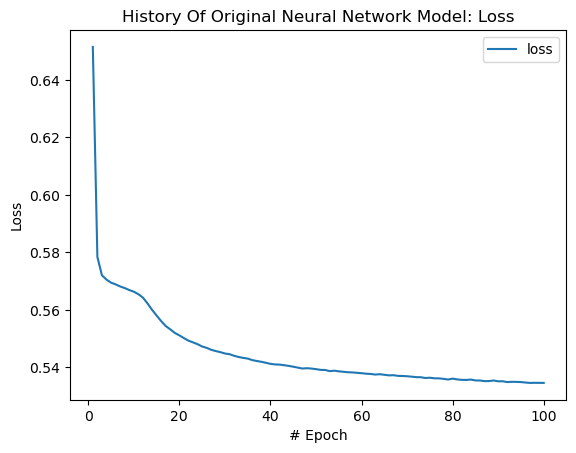

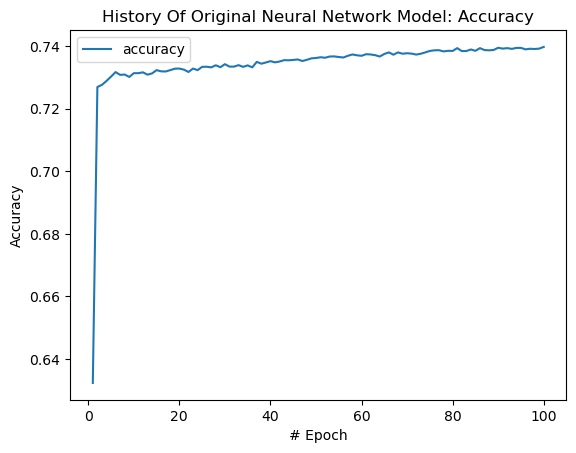

In [51]:
# Plot the loss/accuracy of the original neural network model results
model_plot = pd.DataFrame(
    nn_sequential_original_model_fit.history, 
    index=range(1, len(nn_sequential_original_model_fit.history["loss"]) + 1)
)

# Display the model loss and accuracy results

print()
print(f"\n\n*** Original Neural Network Results: ==> Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy} ***")      
print()

# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss", title="History Of Original Neural Network Model: Loss", xlabel="# Epoch", ylabel="Loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy", title="History Of Original Neural Network Model: Accuracy", xlabel="# Epoch", ylabel="Accuracy")




*** Final Best Results: Permutation:156 ==> Loss: 0.5500848293304443, Accuracy: 0.73399418592453 ***



<AxesSubplot:title={'center':'History Of The Best Neural Network Model: Accuracy'}, xlabel='# Epoch', ylabel='Accuracy'>

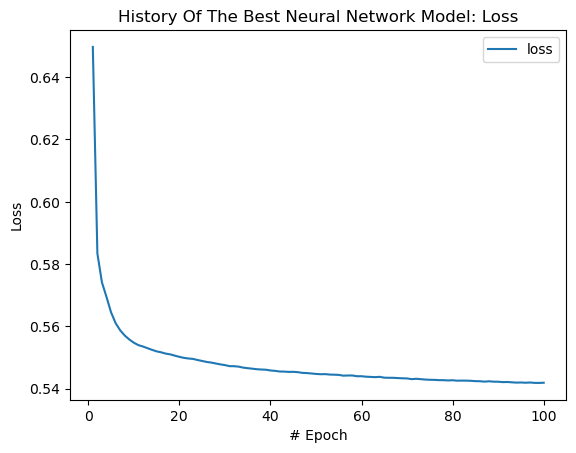

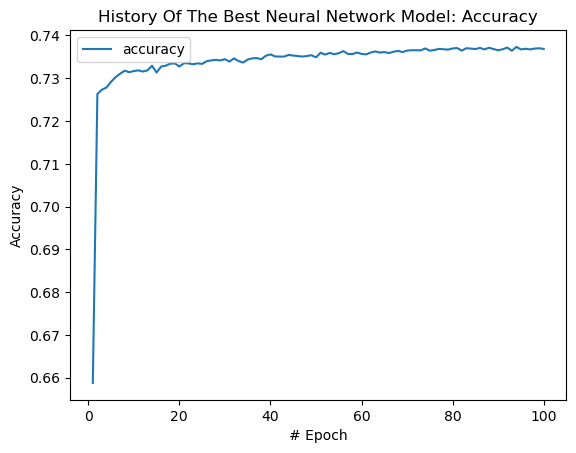

In [52]:
# Plot the loss/accuracy of the Best neural network model results that was obtained from all the different model permutation runs
model_plot = pd.DataFrame(
    nn_sequential_permutation_model_fit_lst[best_permutation_num].history, 
    index=range(1, len(nn_sequential_permutation_model_fit_lst[best_permutation_num].history["loss"]) + 1)
)

print()
print(f"\n\n*** Final Best Results: Permutation:{best_permutation_num+1} ==> Loss: {best_loss_value}, Accuracy: {best_accuracy_value} ***")      
print()

# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss", title="History Of The Best Neural Network Model: Loss", xlabel="# Epoch", ylabel="Loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy", title="History Of The Best Neural Network Model: Accuracy", xlabel="# Epoch", ylabel="Accuracy")

### Step 3: Save each of your alternative models as an HDF5 file.


In [53]:
# Save the loss/accuracy of the original neural network model results

# Save model as JSON
nn_sequential_permutation_model_json = nn_sequential_original_model.to_json()

file_path = Path("./Resources/nn_sequential_original_model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_sequential_permutation_model_json)    
    
# Save weights
file_path = Path("./Resources/nn_sequential_original_model.h5")
nn_sequential_original_model.save_weights(file_path)    

In [54]:
# Save the loss/accuracy of the Best neural network model results that was obtained from all the different model permutation runs
nn_sequential_best_model_json = nn_sequential_permutation_model_npa[best_permutation_num].to_json()

file_path = Path("./Resources/nn_sequential_best_model_json.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_sequential_best_model_json)    
    
# Save weights
file_path = Path("./Resources/nn_sequential_best_model_json.h5")
nn_sequential_permutation_model_npa[best_permutation_num].save_weights(file_path) 